<a href="https://colab.research.google.com/github/Rajat-Sri/Myntra_product_analysis/blob/main/Product_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **EDA on Myntra Product Dataset**

##Dataset first view

In [227]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [228]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [229]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Almabetter/Capstone Projects/EDA/myntra product analysis/data.csv')

In [230]:
df.head()

,product_name,brand_name,rating,rating_count,marked_price,discounted_price,sizes,product_link,img_link,product_tag,brand_tag,discount_amount,discount_percent
0,Croc Textured Two Fold Wallet,Lino Perros,0.0,0,1295,828,Onesize,wallets/lino-perros/lino-perros-women-peach-co...,"https://assets.myntassets.com/dpr_2,q_60,w_210...",wallets,lino-perros,467,36
1,Men Striped Sliders,Mast & Harbour,4.0,76,1299,584,"UK6,UK7,UK8,UK9,UK10,UK11",flip-flops/mast--harbour/mast--harbour-men-nav...,"https://assets.myntassets.com/dpr_2,q_60,w_210...",flip-flops,mast--harbour,715,55
2,Printed A-line Kurta,Biba,4.3,66,1999,1599,"S,M,L,XL,XXL,3XL",kurtas/biba/biba-women-off-white--black-printe...,"https://assets.myntassets.com/dpr_2,q_60,w_210...",kurtas,biba,400,20
3,Girls Floral Printed T-shirt,Anthrilo,0.0,0,599,539,"7-8Y,8-9Y,9-10Y",tshirts/anthrilo/anthrilo-girls-white-floral-p...,"https://assets.myntassets.com/dpr_2,q_60,w_210...",tshirts,anthrilo,60,10
4,Women Printed Kurta with Skirt,FASHION DWAR,0.0,0,2899,2899,"S,M,L,XL",kurta-sets/fashion-dwar/fashion-dwar-women-mul...,"https://assets.myntassets.com/dpr_2,q_60,w_210...",kurta-sets,fashion-dwar,0,0


In [231]:
df.shape

(168029, 13)

In [232]:
df.isnull().sum()

product_name        0
brand_name          0
rating              0
rating_count        0
marked_price        0
discounted_price    0
sizes               0
product_link        0
img_link            0
product_tag         0
brand_tag           0
discount_amount     0
discount_percent    0
dtype: int64

In [233]:
# count the number of duplicate rows
duplicates = df.duplicated().sum()
duplicates

21418

In [234]:
# drop the duplicate rows and assign the result back to df
df.drop_duplicates(inplace=True)

In [235]:
df.describe()

,rating,rating_count,marked_price,discounted_price,discount_amount,discount_percent
count,146611.000000,146611.000000,146611.000000,146611.000000,146611.000000,146611.000000
mean,2.317154,123.589219,2525.860379,1532.622675,993.237704,37.147765
std,2.097438,817.995615,2437.720930,1842.427134,1235.525991,24.594289
min,0.000000,0.000000,50.000000,49.000000,0.000000,0.000000
25%,0.000000,0.000000,1299.000000,679.000000,210.000000,15.000000
50%,3.600000,6.000000,1999.000000,1012.000000,702.000000,40.000000
75%,4.300000,34.000000,2999.000000,1749.000000,1317.000000,59.000000
max,5.000000,55900.000000,113999.000000,45900.000000,68400.000000,91.000000


## 1. How many unique products are there in the dataset?

- You need to find product ID of each product from product_link and then find the number of unique product ids

- Finding Unique Products as per their Product ID
Removing Products with Duplicate Product ID

In [236]:
# Define a function to extract the product ID from the link
def extract_product_id(link):
    return link.split('/')[-2]

# Apply the function to the 'product_link' column to create a new 'product_id' column
df['product_id'] = df['product_link'].apply(extract_product_id)

# Check the first 5 rows of the DataFrame to see if the product ID was extracted correctly
df.head()

,product_name,brand_name,rating,rating_count,marked_price,discounted_price,sizes,product_link,img_link,product_tag,brand_tag,discount_amount,discount_percent,product_id
0,Croc Textured Two Fold Wallet,Lino Perros,0.0,0,1295,828,Onesize,wallets/lino-perros/lino-perros-women-peach-co...,"https://assets.myntassets.com/dpr_2,q_60,w_210...",wallets,lino-perros,467,36,18070682
1,Men Striped Sliders,Mast & Harbour,4.0,76,1299,584,"UK6,UK7,UK8,UK9,UK10,UK11",flip-flops/mast--harbour/mast--harbour-men-nav...,"https://assets.myntassets.com/dpr_2,q_60,w_210...",flip-flops,mast--harbour,715,55,12548958
2,Printed A-line Kurta,Biba,4.3,66,1999,1599,"S,M,L,XL,XXL,3XL",kurtas/biba/biba-women-off-white--black-printe...,"https://assets.myntassets.com/dpr_2,q_60,w_210...",kurtas,biba,400,20,13446092
3,Girls Floral Printed T-shirt,Anthrilo,0.0,0,599,539,"7-8Y,8-9Y,9-10Y",tshirts/anthrilo/anthrilo-girls-white-floral-p...,"https://assets.myntassets.com/dpr_2,q_60,w_210...",tshirts,anthrilo,60,10,18017006
4,Women Printed Kurta with Skirt,FASHION DWAR,0.0,0,2899,2899,"S,M,L,XL",kurta-sets/fashion-dwar/fashion-dwar-women-mul...,"https://assets.myntassets.com/dpr_2,q_60,w_210...",kurta-sets,fashion-dwar,0,0,18015232


In [237]:
# Reorder the columns to put the 'product_id' column first
cols = df.columns.tolist()
cols = ['product_id'] + [col for col in cols if col != 'product_id']
df = df[cols]

# Check the first 5 rows of the DataFrame to see if the product ID was extracted correctly
df.head()

,product_id,product_name,brand_name,rating,rating_count,marked_price,discounted_price,sizes,product_link,img_link,product_tag,brand_tag,discount_amount,discount_percent
0,18070682,Croc Textured Two Fold Wallet,Lino Perros,0.0,0,1295,828,Onesize,wallets/lino-perros/lino-perros-women-peach-co...,"https://assets.myntassets.com/dpr_2,q_60,w_210...",wallets,lino-perros,467,36
1,12548958,Men Striped Sliders,Mast & Harbour,4.0,76,1299,584,"UK6,UK7,UK8,UK9,UK10,UK11",flip-flops/mast--harbour/mast--harbour-men-nav...,"https://assets.myntassets.com/dpr_2,q_60,w_210...",flip-flops,mast--harbour,715,55
2,13446092,Printed A-line Kurta,Biba,4.3,66,1999,1599,"S,M,L,XL,XXL,3XL",kurtas/biba/biba-women-off-white--black-printe...,"https://assets.myntassets.com/dpr_2,q_60,w_210...",kurtas,biba,400,20
3,18017006,Girls Floral Printed T-shirt,Anthrilo,0.0,0,599,539,"7-8Y,8-9Y,9-10Y",tshirts/anthrilo/anthrilo-girls-white-floral-p...,"https://assets.myntassets.com/dpr_2,q_60,w_210...",tshirts,anthrilo,60,10
4,18015232,Women Printed Kurta with Skirt,FASHION DWAR,0.0,0,2899,2899,"S,M,L,XL",kurta-sets/fashion-dwar/fashion-dwar-women-mul...,"https://assets.myntassets.com/dpr_2,q_60,w_210...",kurta-sets,fashion-dwar,0,0


In [238]:
# Count the number of unique product IDs
num_unique_products = df["product_id"].nunique()

# Print the result
print("Number of unique products:", num_unique_products)

Number of unique products: 146435


## 2. What is the average rating of the products?
- Try it without the product that are having rating 0
- Try it without the product that are having 0 people given any rating

In [239]:
# Filter out products with rating and rating_count of 0
df_filtered = df[(df['rating'] > 0) & (df['rating_count'] > 0)]

# Calculate the average rating
avg_rating = df_filtered['rating'].mean()

print(f"The average rating of the products is {avg_rating:.2f}")


The average rating of the products is 4.17


## 3.What is the average discount percentage of the products? 

In [240]:
# Calculate the average discount percentage
avg_discount_percent = df['discount_percent'].mean()

print(f"The average discount percentage of the products is {avg_discount_percent:.2f}%")

The average discount percentage of the products is 37.15%


## 4. What are the top 5 most expensive products?
- Make sure that there can be multiple brands with same name so you can take brand ID also into considration

In [241]:
top5_expensive = df.groupby(['product_name']).agg({'marked_price': 'max'}).sort_values(by='marked_price', ascending=False).head(5)
top5_expensive

,marked_price
product_name,
Lord Krishna Showpiece,113999
Durga Maa On Lion Showpiece,71999
Men Stainless Steel Straps Multi Function Automatic Motion Watch,63950
Men Leather Straps Multi Function Automatic Motion Watch,56950
Men Stainless Steel Straps Automatic Motion Watch,53950


## 5. What are the top 10 brands by the number of products in the dataset?

In [242]:
# group the data by brand_name and count the number of products for each brand
brand_counts = df.groupby('brand_name')['product_id'].count()

# sort the results in descending order and select the top 10 brands
top_10_brands = brand_counts.sort_values(ascending=False).head(10)

# print the top 10 brands
top_10_brands


brand_name
Roadster                 4557
Mast & Harbour           2398
DressBerry               2077
H&M                      1998
Anouk                    1785
max                      1773
HRX by Hrithik Roshan    1746
Puma                     1668
MANGO                    1626
HERE&NOW                 1620
Name: product_id, dtype: int64

## 6. List top 5 brands with maxiumum average rating of products?
- Neglect the products which are not reviewed by any person

In [243]:
# filter out products with a rating count of 0
new_df = df[df['rating_count'] > 0]

# group the data by brand_name and calculate the average rating for each brand
brand_ratings = new_df.groupby('brand_name')['rating'].mean()

# sort the brands by the average rating in descending order and select the top 5 brands
top_5_brands = brand_ratings.sort_values(ascending=False).head(5)
top_5_brands

brand_name
1 Stop Fashion    5.0
ORTANGE           5.0
Tiara             5.0
Anahi             5.0
Apple             5.0
Name: rating, dtype: float64

## 7. Plot a histogram of the distribution of ratings of following brand.
- H&M,
max,
Puma,
MANGO,

- Neglect the products which are not reviewed by any person

In [244]:
# Subset the dataset to only include rows for the given brands
brands = ["H&M", "max", "Puma", "MANGO"]
df_subset = df[df["brand_name"].isin(brands) & (df['rating_count'] > 0)]

In [245]:
print(df_subset['brand_name'].unique())

['H&M' 'MANGO' 'Puma' 'max']


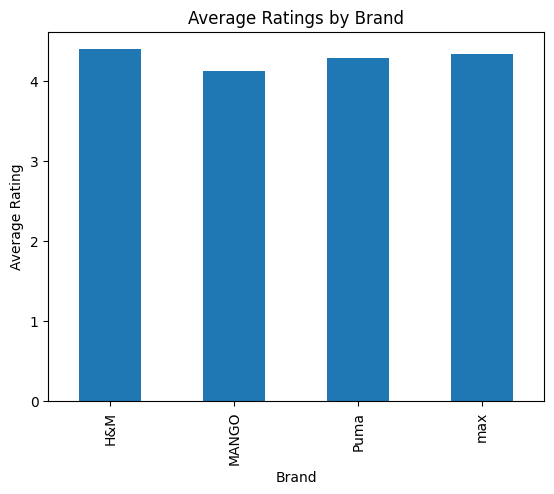

In [246]:
# Group the subsetted dataset by brand_name and calculate the average rating
ratings_by_brand = df_subset.groupby("brand_name")["rating"].mean()

# Plot the average ratings using a bar chart
ratings_by_brand.plot(kind="bar")
plt.title("Average Ratings by Brand")
plt.xlabel("Brand")
plt.ylabel("Average Rating")
plt.show()

## 8. What is the distribution of discounts by brand for specific brands mentioned below?
- H&M
max
Puma
MANGO

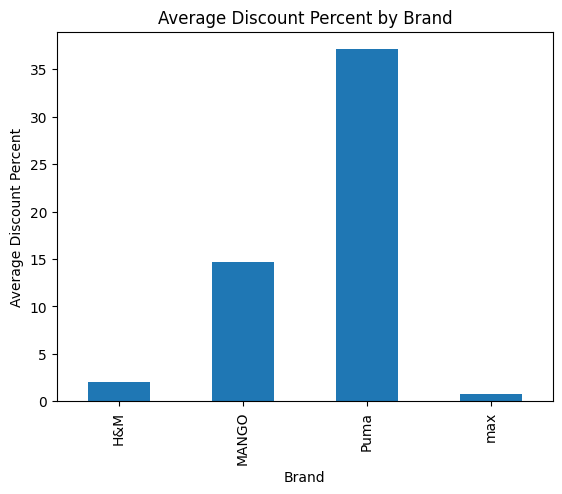

In [247]:
# Subset the dataset to only include rows for the given brands
brands = ["H&M", "max", "Puma", "MANGO"]
df_subset = df[df["brand_name"].isin(brands)]

# Group the subsetted dataset by brand_name and calculate the average discount_percent
discount_by_brand = df_subset.groupby("brand_name")["discount_percent"].mean()

# Plot the average discount_percent using a bar chart
discount_by_brand.plot(kind="bar")
plt.title("Average Discount Percent by Brand")
plt.xlabel("Brand")
plt.ylabel("Average Discount Percent")
plt.show()


## 9. Is there any trend or pattern you can find between discount percent and rating of the product?

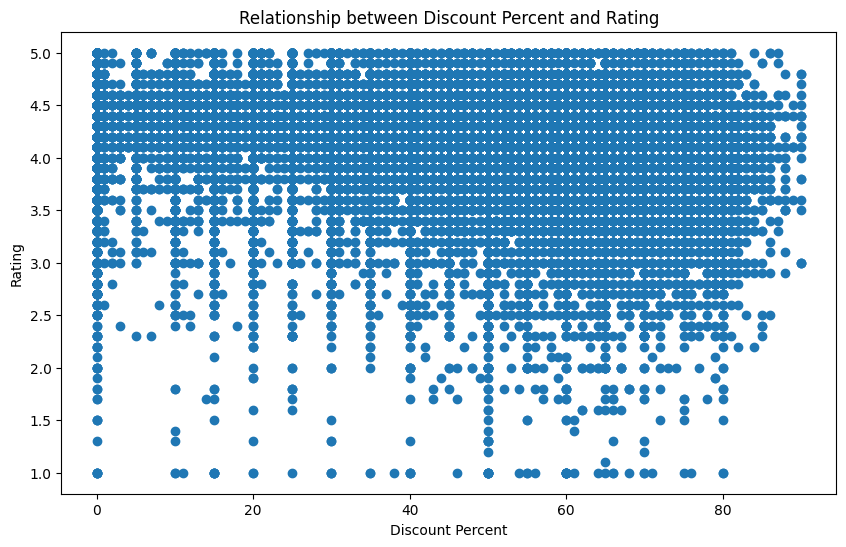

In [248]:
# Filter out products with a rating of 0
df1 = df[df["rating"] > 0]

# Create a scatter plot of discount percent vs. rating
plt.figure(figsize=(10, 6))
plt.scatter(df1["discount_percent"], df1["rating"])
plt.xlabel("Discount Percent")
plt.ylabel("Rating")
plt.title("Relationship between Discount Percent and Rating")
plt.show()

## 10. What are the top 10 most popular tags in the dataset?

In [249]:
# Count the frequency of each product_tag in the dataset
tag_counts = df["product_tag"].value_counts()

# Sort the frequency counts in descending order
sorted_tag_counts = tag_counts.sort_values(ascending=False)

# Take the top 10 most frequent product_tag
top_10_tags = sorted_tag_counts.head(10)

# Print the top 10 most frequent product_tag
print(top_10_tags)


tshirts         14909
shirts          10664
dresses         10360
tops             7781
kurta-sets       7163
kurtas           7086
jeans            6960
trousers         5147
casual-shoes     4722
handbags         4373
Name: product_tag, dtype: int64


## 11. Are there any relations between the rating and number of people who rated the products? 

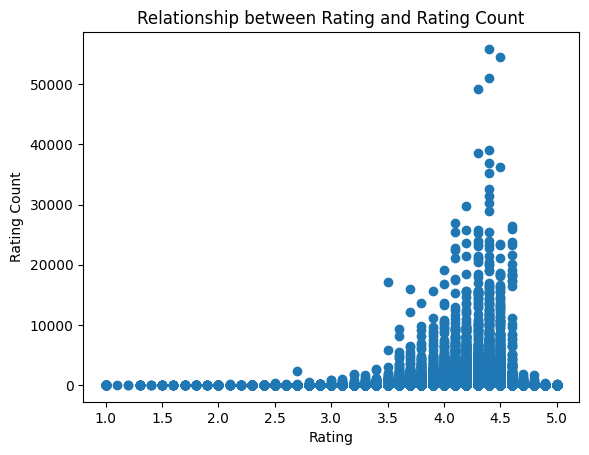

In [250]:
# Subset the dataset to remove rows with rating or rating_count equal to 0
relation_df = df[(df["rating"] != 0) & (df["rating_count"] != 0)]

# Plot a scatter plot with rating on the x-axis and rating_count on the y-axis
plt.scatter(relation_df["rating"], relation_df["rating_count"])
plt.title("Relationship between Rating and Rating Count")
plt.xlabel("Rating")
plt.ylabel("Rating Count")
plt.show()


## 12. What are the top 10 Most Expensive brands?

In [251]:
# Group the data by brand_name and calculate the mean of marked_price for each brand
brand_mean_price = df.groupby("brand_name")["marked_price"].max()

# Sort the resulting data frame by mean marked_price in descending order
sorted_brands = brand_mean_price.sort_values(ascending=False)

# Take the top 10 brands with the highest mean marked_price
top_10_brands = sorted_brands.head(10)

# Print the top 10 most expensive brands
print(top_10_brands)


brand_name
eCraftIndia              113999
EARNSHAW                  63950
D1 Milano                 51000
Masaba                    45000
dyson                     44900
Victorinox                44000
Tom Ford                  43900
TISSOT                    43500
Versace Jeans Couture     41000
Calvin Klein              40900
Name: marked_price, dtype: int64


## 13. What are the top 10 Most Expensive Product Category? 

In [252]:
# Group the data by product_tag and calculate the mean of marked_price for each product tag
product_tag_mean_price = df.groupby("product_tag")["marked_price"].max()

# Sort the resulting data frame by mean marked_price in descending order
sorted_product_tags = product_tag_mean_price.sort_values(ascending=False)

# Take the top 10 product tags with the highest mean marked_price
top_10_product_tags = sorted_product_tags.head(10)

# Print the top 10 most expensive product tags
print(top_10_product_tags)

product_tag
showpieces        113999
watches            63950
lehenga-choli      45000
hair-appliance     44900
sunglasses         43900
jeans              41000
trolley-bag        40900
carpets            40350
tshirts            40000
shirts             39000
Name: marked_price, dtype: int64


## 14. Analyse the Violen Plot of watches of following brands mentioned below ?
- Take brand_tag as tommy-hilfiger, daniel-wellington, armani-exchange, emporio-armani, earnshaw, tissot

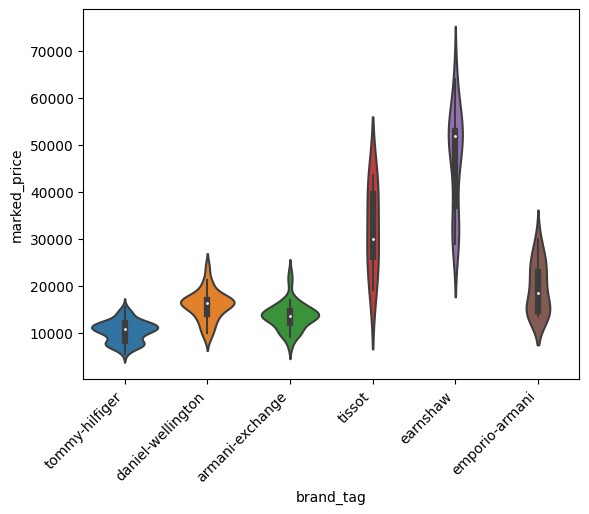

In [253]:
# Subset the dataset to include only watches from the specified brands
brands = ["tommy-hilfiger", "daniel-wellington", "armani-exchange", "emporio-armani", "earnshaw", "tissot"]
brands_df = df[(df["product_tag"] == "watches") & (df["brand_tag"].isin(brands))]

# Create a violin plot of the marked_price for each brand
sns.violinplot(x="brand_tag", y="marked_price", data=brands_df)
plt.xticks(rotation=45, ha='right')
plt.show()


## 15. List top 5 brands which are having most wide range or products

In [254]:
# Count the number of unique product_ids for each brand
brand_product_counts = df.groupby("brand_name")["product_id"].nunique()

# Sort the counts in descending order and print the top 5
top_brands = brand_product_counts.sort_values(ascending=False)[:5]
print(top_brands)


brand_name
Roadster          4557
Mast & Harbour    2397
DressBerry        2073
H&M               1998
Anouk             1784
Name: product_id, dtype: int64


## Insight Report:

From the data analysis, we can observe that the most popular product types are casual wear like t-shirts, shirts, jeans, and dresses, which are widely sold in the market. Most of the customers are rating the products between 4-5, indicating that the products are of good quality and meet the expectations of the customers.

The top 10 brands with the maximum number of products are mainly clothing brands like Roadster, Mast & Harbour, DressBerry, H&M, Anouk, max, HRX by Hrithik Roshan, Puma, MANGO, and HERE&NOW. These brands offer a wide range of products and are popular among customers.

In terms of pricing, we found that eCraftIndia, EARNSHAW, D1 Milano, Masaba, dyson, Victorinox, Tom Ford, TISSOT, Versace Jeans Couture, and Calvin Klein are the most expensive brands. The most expensive product categories are showpieces, watches, lehenga-choli, hair appliances, sunglasses, jeans, trolley bags, carpets, t-shirts, and shirts.

We also analyzed the relationship between the discount percentage and rating of the products. It was found that products with a higher discount percentage tend to have a lower rating. However, further analysis using scatter plots and regression analysis can provide a better understanding of this relationship.

Overall, this analysis provides valuable insights into the product offerings and pricing of different brands, which can be useful for customers and businesses alike.